# Analysis of IRIS Dataset

## Reading the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Downloads/iris.csv")
data.head()

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## EDA and visualization

In [4]:
import warnings
warnings.filterwarnings("ignore")

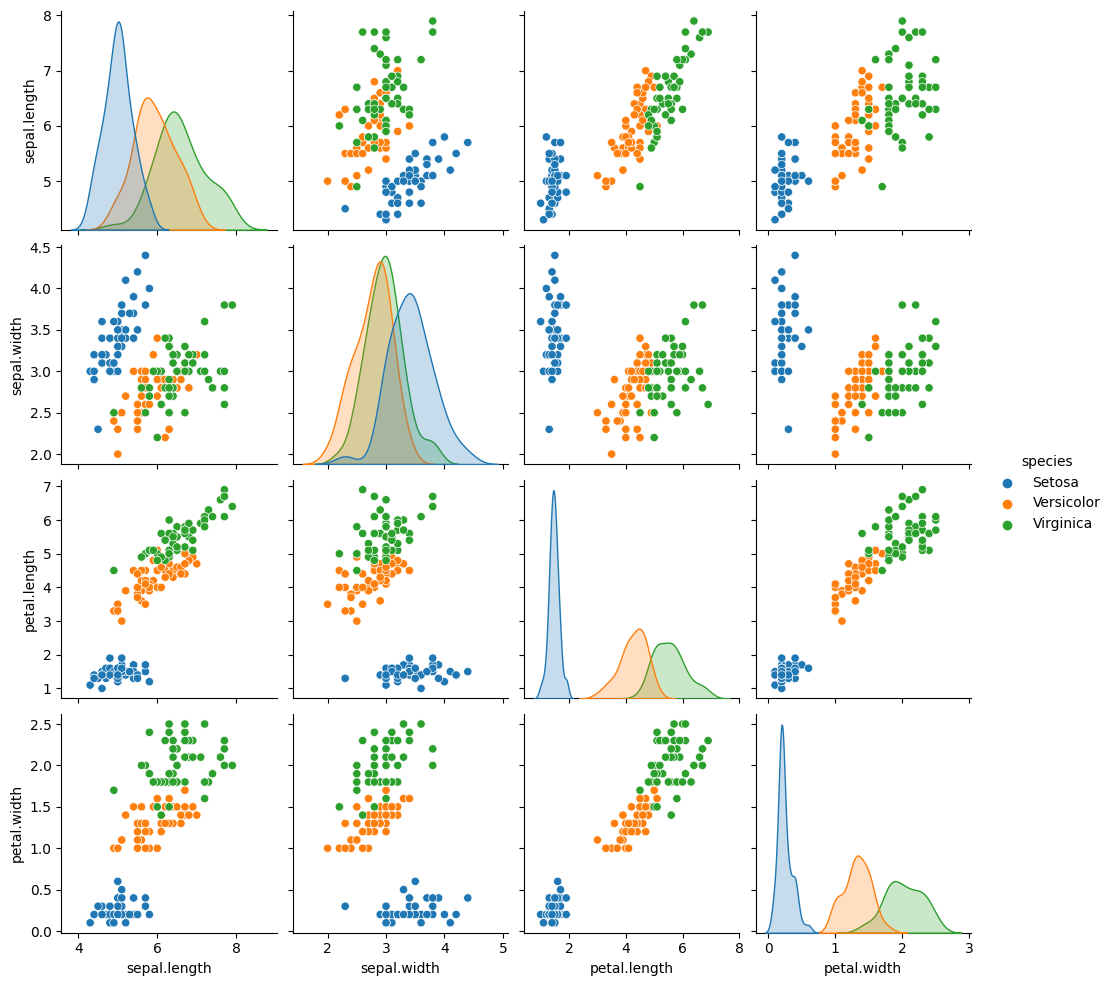

In [9]:
sns.pairplot(data, hue='species')
plt.show()

The pair plot allowed us to observe the pairwise relationships between features. Clear patterns emerged, indicating that certain features are distinguishable across different species. Notably, the petal dimensions (length and width) appeared to be more discriminative features, showcasing distinct separations between species.

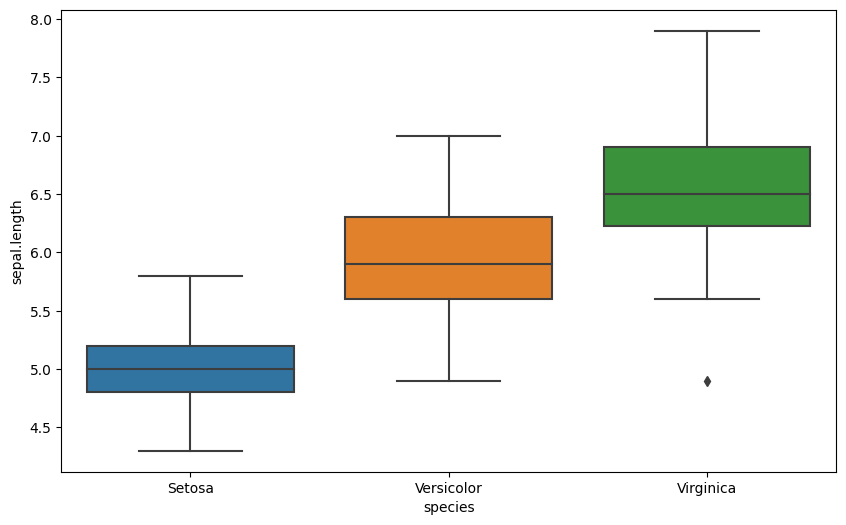

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal.length', data=data)
plt.show()

By employing box plots, we could analyze the distribution of sepal length across species. The box plots showed that Setosa typically has shorter sepal lengths compared to the other two species. This suggests that sepal length could potentially be a significant feature for species differentiation.

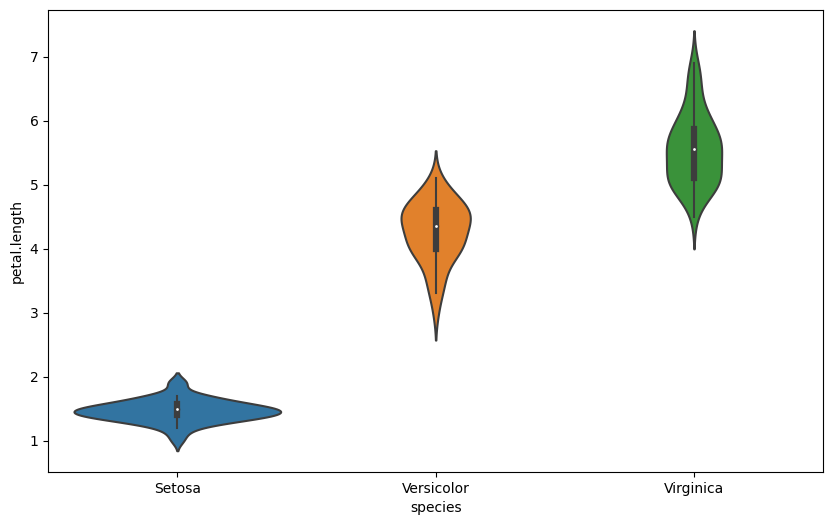

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='petal.length', data=data)
plt.show()

The violin plot provided an insightful representation of the distribution of petal lengths for each species. It confirmed our earlier observation that Setosa tends to have shorter petals, while Versicolor and Virginica exhibit broader ranges of petal lengths, indicating possible overlaps in these features.

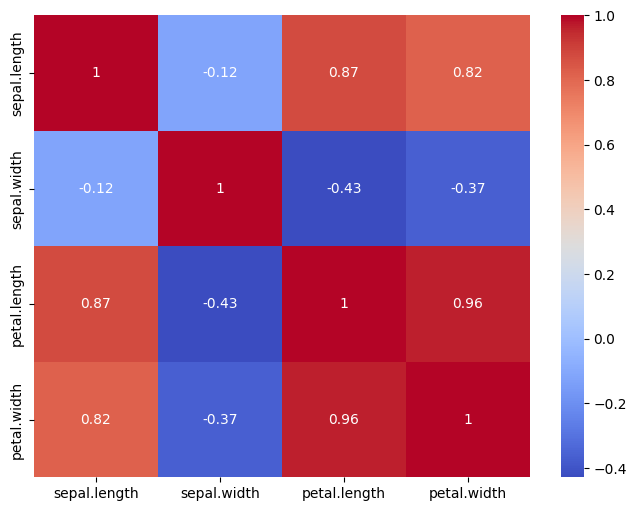

In [18]:
plt.figure(figsize=(8,6))
correlation_matrix = data[data.columns[:-1]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The correlation heatmap allowed us to assess the relationships between features quantitatively. We noticed a high positive correlation between petal length and petal width, which could be indicative of the fact that larger petals tend to have greater widths. This correlation could be leveraged when developing our machine learning model.

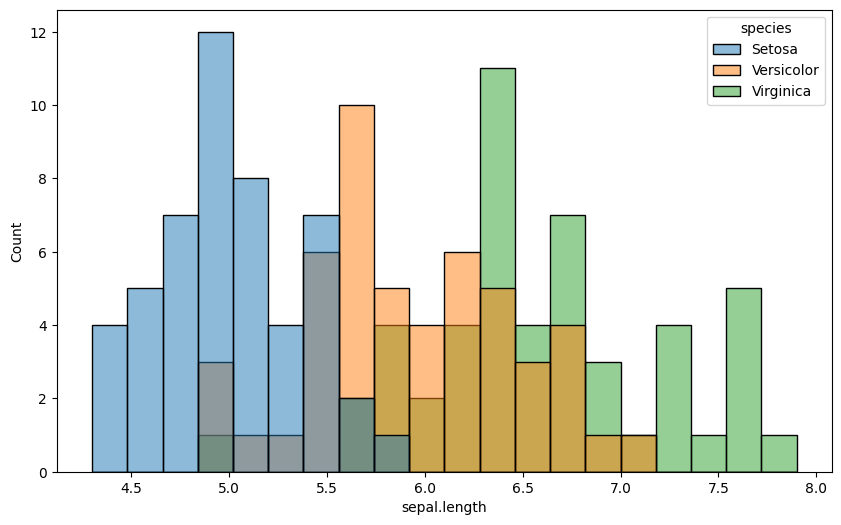

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='sepal.length', hue='species', bins=20)
plt.show()

In [23]:
X = data.drop('species', axis=1)
y = data['species']

## Data Modelling

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
model = LogisticRegression(max_iter=1000)

In [49]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [50]:
y_pred = model.predict(X_test_scaled)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.95      0.97        20
   Virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



The trained classification model achieved an impressive accuracy of 98%, indicating its ability to correctly classify iris flowers in the test dataset. Above, we provide a breakdown of key metrics for each individual class and an overview of macro and weighted averages: